<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gold Price Prediction** 
**Objective :**- Forecasting gold price for next 30 days based on historical data.
(Considering last four years of historical data)

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 32.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-30,1812.699951
2021-12-31,1827.500000
2022-01-03,1799.400024


In [5]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data.head()

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976


In [7]:
data.tail()

,Price
Date,
2021-12-30,1812.699951
2021-12-31,1827.500000
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976


In [8]:
train = data.head(804)
test = data.tail(200)

## **EDA**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011 entries, 2018-01-02 to 2022-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1011 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


**Line chart**

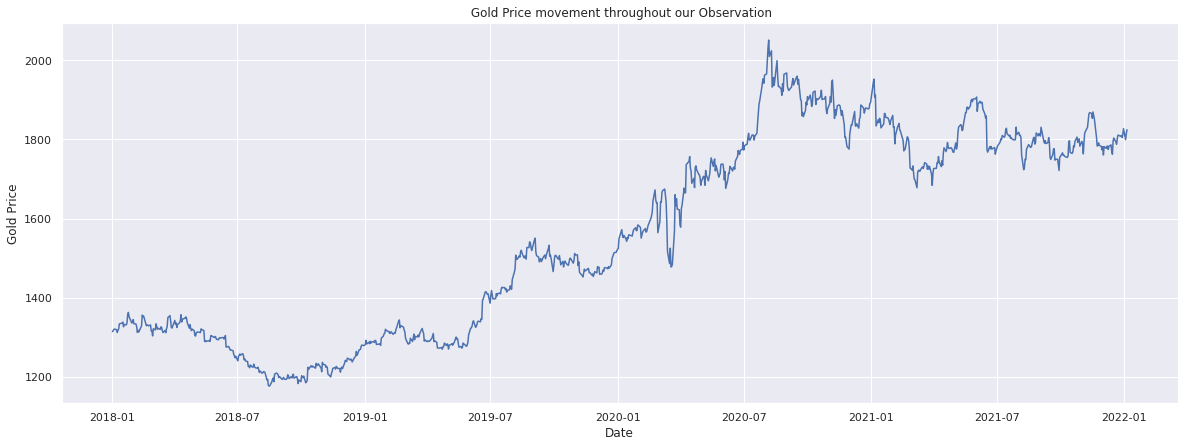

In [10]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

In [ ]:
#from IPython.core.pylabtools import figsize
#plt.figure(figsize=(20,7))
#data.Price.plot()
#plt.title(" Gold Price movement throughout our Observation")
#plt.ylabel('Gold Price')
#plt.show()

In [11]:
data

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-30,1812.699951
2021-12-31,1827.500000
2022-01-03,1799.400024


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011 entries, 2018-01-02 to 2022-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1011 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [13]:
data.isnull().sum()

Price    0
dtype: int64

In [14]:
print(len(data))

1011


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1011.0,1559.563204,249.407331,1176.199951,1311.450012,1537.800049,1792.549988,2051.5


### **Checking for Stationarity in data using Dickey-Fuller test**

In [16]:
X = train['Price'].values

result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "} stationary')

ADF Statistic: -0.542786
p-value: 0.883393
Critical Values:
Inference: Time Series is non stationary


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

### **Auto correlation graph**

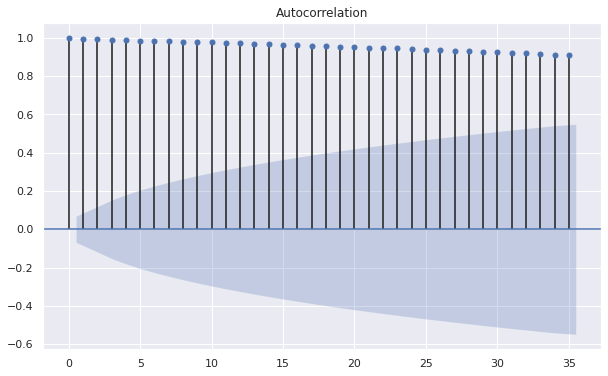

In [17]:
plt.rc("figure", figsize=(10,6))
plot_acf(train['Price'],lags=35)
plt.show()

### **PACF graph**

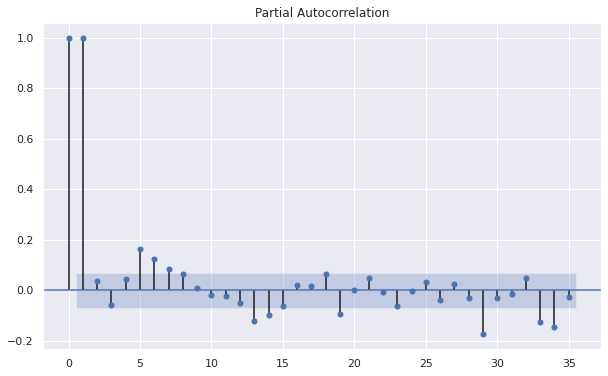

In [18]:
plot_pacf(train['Price'],lags=35)
plt.show()

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [19]:
data_without_sea = train.diff().dropna()

In [ ]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 2018-01-03 to 2021-03-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   803 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


### **Again checking for Stationarity in data using Dickey-Fuller test**

In [20]:
X = data_without_sea['Price'].values
result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "}stationary')

ADF Statistic: -13.530644
p-value: 0.000000
Critical Values:
Inference: Time Series is  stationary


### **Auto correlation graph after 1 step differencing**

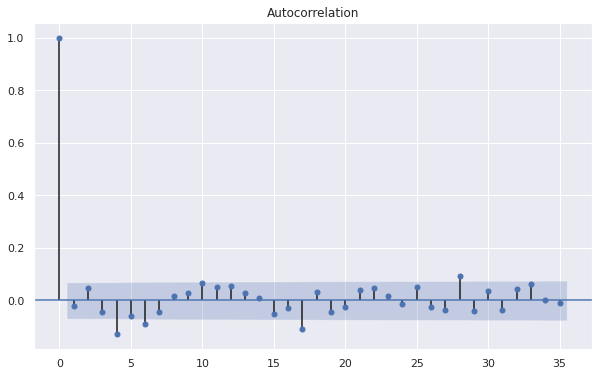

In [21]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea['Price'], lags=35)
plt.show()

### **Partial Auto Correlation graph after differencing**

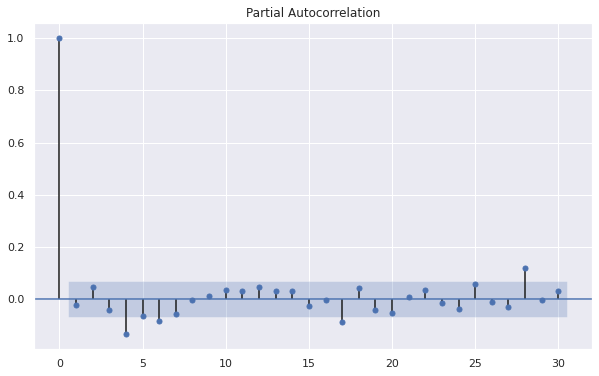

In [22]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea)
plt.show()

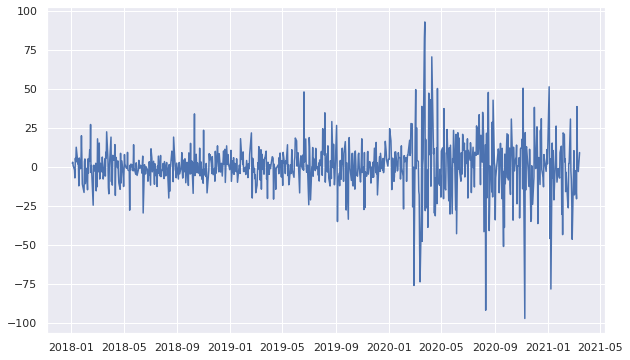

In [23]:
plt.plot(data_without_sea)
plt.show()

In [24]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 2018-01-03 to 2021-03-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   803 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [25]:
# separate out a validation dataset

print('Dataset %d, Validation %d' % (len(train), len(test)))
train.to_csv('dataset.csv', header=False)
test.to_csv('validation.csv', header=False)


Dataset 804, Validation 200


### **Persistence/ Base model**

In [26]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

In [27]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1623.900, Expected=1622.000
>Predicted=1622.000, Expected=1583.400
>Predicted=1583.400, Expected=1578.200
>Predicted=1578.200, Expected=1625.700
>Predicted=1625.700, Expected=1633.700
>Predicted=1633.700, Expected=1677.000
>Predicted=1677.000, Expected=1664.800
>Predicted=1664.800, Expected=1665.400
>Predicted=1665.400, Expected=1736.200
>Predicted=1736.200, Expected=1744.800
>Predicted=1744.800, Expected=1756.700
>Predicted=1756.700, Expected=1727.200
>Predicted=1727.200, Expected=1720.400
>Predicted=1720.400, Expected=1689.200
>Predicted=1689.200, Expected=1701.600
>Predicted=1701.600, Expected=1678.200
>Predicted=1678.200, Expected=1728.700
>Predicted=1728.700, Expected=1733.300
>Predicted=1733.300, Expected=1723.500
>Predicted=1723.500, Expected=1711.900
>Predicted=1711.900, Expected=1710.500
>Predicted=1710.500, Expected=1703.400
>Predicted=1703.400, Expected=1684.200
>Predicted=1684.200, Expected=1694.500
>Predicted=1694.500, Expected=1706.900
>Predicted=1706.900, Expe

### **ARIMA Hyperparameters**

In [28]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### **Grid search for p,d,q values**

In [29]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [30]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=404.494
ARIMA(0, 0, 1) RMSE=213.119
ARIMA(0, 1, 0) RMSE=22.066
ARIMA(0, 1, 1) RMSE=22.116
ARIMA(0, 1, 2) RMSE=22.158
ARIMA(0, 2, 0) RMSE=32.654
ARIMA(0, 2, 1) RMSE=22.137
ARIMA(1, 0, 0) RMSE=22.096
ARIMA(1, 1, 0) RMSE=22.118
ARIMA(1, 2, 0) RMSE=26.915
ARIMA(1, 2, 1) RMSE=22.187
ARIMA(1, 2, 2) RMSE=22.233
ARIMA(2, 0, 0) RMSE=22.762
ARIMA(2, 1, 0) RMSE=22.151
ARIMA(2, 1, 1) RMSE=22.136
ARIMA(2, 2, 0) RMSE=25.821
Best ARIMA(0, 1, 0) RMSE=22.066


### **Build Model based on the optimized values**

In [31]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [32]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

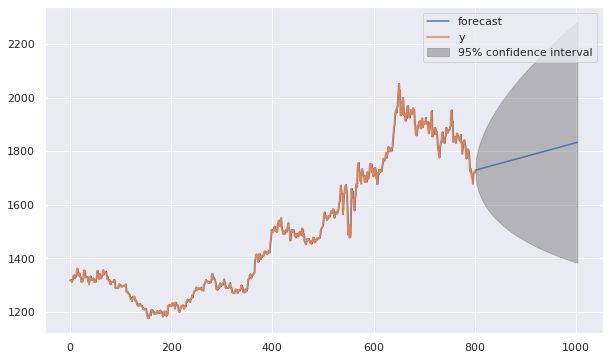

In [33]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=200)[0]
model_fit.plot_predict(1, 1004)
plt.show()

In [34]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

55.26872791354572

In [35]:
val[1]

0      1724.900024
1      1732.199951
2      1712.099976
3      1683.900024
4      1713.800049
          ...     
195    1812.699951
196    1827.500000
197    1799.400024
198    1814.000000
199    1824.599976
Name: 1, Length: 200, dtype: float64

In [36]:
forecast

array([1729.41461303, 1729.92920165, 1730.44379027, 1730.95837889,
       1731.47296751, 1731.98755613, 1732.50214475, 1733.01673337,
       1733.53132199, 1734.04591061, 1734.56049923, 1735.07508785,
       1735.58967647, 1736.10426509, 1736.61885371, 1737.13344233,
       1737.64803095, 1738.16261957, 1738.67720819, 1739.19179681,
       1739.70638543, 1740.22097405, 1740.73556267, 1741.25015129,
       1741.76473991, 1742.27932853, 1742.79391715, 1743.30850577,
       1743.82309439, 1744.33768301, 1744.85227163, 1745.36686025,
       1745.88144887, 1746.39603749, 1746.91062611, 1747.42521473,
       1747.93980335, 1748.45439197, 1748.96898059, 1749.48356921,
       1749.99815783, 1750.51274645, 1751.02733507, 1751.54192369,
       1752.05651231, 1752.57110093, 1753.08568955, 1753.60027817,
       1754.11486679, 1754.62945541, 1755.14404403, 1755.65863265,
       1756.17322127, 1756.68780989, 1757.20239851, 1757.71698713,
       1758.23157575, 1758.74616437, 1759.26075299, 1759.77534

### **Combine train and test data and build final model**

In [37]:
# fit model
#data = read_csv('data', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [38]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

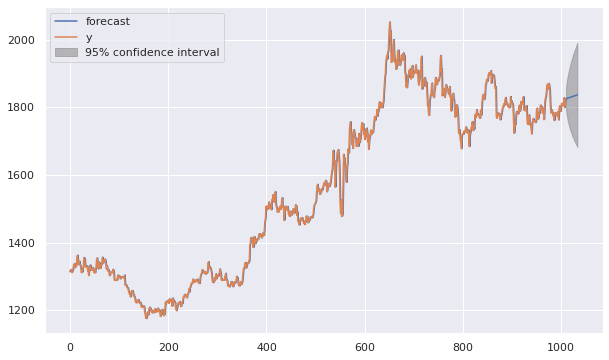

In [39]:
forecast_final=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,1034)
plt.show()

In [40]:
forecast_final

array([1825.10581741, 1825.61165924, 1826.11750106, 1826.62334289,
       1827.12918471, 1827.63502653, 1828.14086836, 1828.64671018,
       1829.15255201, 1829.65839383, 1830.16423566, 1830.67007748,
       1831.17591931, 1831.68176113, 1832.18760296, 1832.69344478,
       1833.19928661, 1833.70512843, 1834.21097026, 1834.71681208,
       1835.22265391, 1835.72849573, 1836.23433756, 1836.74017938,
       1837.24602121, 1837.75186303, 1838.25770486, 1838.76354668,
       1839.2693885 , 1839.77523033])